In [62]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#library to remove punctuation

#string
import string

#Sentiment Analysis 
from textblob import TextBlob


In [63]:
#Import dataset 
data = pd.read_csv('datasets/final_dataset.csv') 
data.head()

,Job Title,Publish Date,Closing Date,Position Level,Year Experience,Number of Hiring,Salary Range (Min),Salary Range (Max),Gender,Age,...,Location 3,Location 4,Location 5,Location 6,Location 7,Duration of Recruiting,Major 1,Major 2,Major 3,Major 4
0,Unity Game Developer,"Thursday, September 8, 2022","Saturday, October 8, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
1,Sales Engineer -Dynamic Technology,"Monday, September 5, 2022","Wednesday, October 5, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
2,Senior Product Development Officer (1post),"Thursday, September 8, 2022","Saturday, October 8, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
3,"Senior Auditor, IT Audit","Thursday, August 18, 2022","Saturday, September 17, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
4,Solution Architect,"Monday, August 15, 2022","Wednesday, September 14, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Information Technology,Computer Science,NaN,NaN


In [64]:
#Check the data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job Title               328 non-null    object 
 1   Publish Date            328 non-null    object 
 2   Closing Date            328 non-null    object 
 3   Position Level          298 non-null    object 
 4   Year Experience         270 non-null    float64
 5   Number of Hiring        328 non-null    int64  
 6   Salary Range (Min)      28 non-null     object 
 7   Salary Range (Max)      29 non-null     object 
 8   Gender                  328 non-null    object 
 9   Age                     328 non-null    object 
 10  Term                    328 non-null    object 
 11  Job Category            328 non-null    object 
 12  Industry                328 non-null    object 
 13  Education Level         312 non-null    object 
 14  Language 1              276 non-null    ob

In [65]:
#sum the dataset is null 
data.isnull().sum()

Job Title                   0
Publish Date                0
Closing Date                0
Position Level             30
Year Experience            58
Number of Hiring            0
Salary Range (Min)        300
Salary Range (Max)        299
Gender                      0
Age                         0
Term                        0
Job Category                0
Industry                    0
Education Level            16
Language 1                 52
Langue level 1             52
Langue 2                  307
Language level 2          307
Language 3                322
Language level 3          322
Location 1                  0
Location 2                321
Location 3                326
Location 4                326
Location 5                326
Location 6                328
Location 7                328
Duration of Recruiting      0
Major 1                     0
Major 2                   249
Major 3                   324
Major 4                   326
dtype: int64

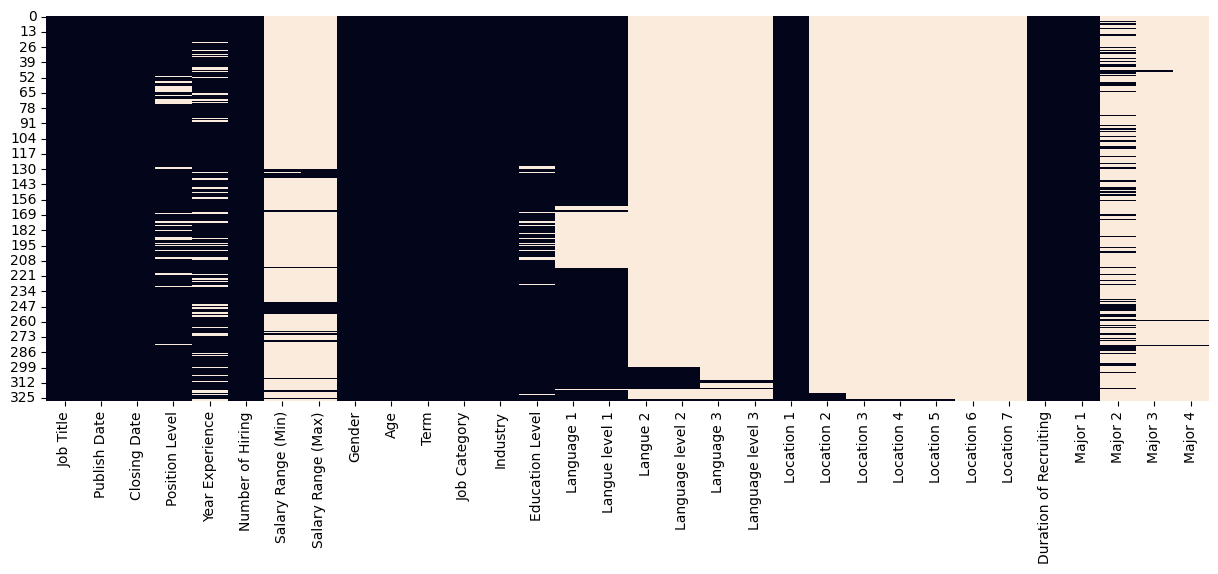

In [66]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks()
plt.show()

In [67]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  2
************************************************************************************************************


In [68]:
#drop the features are not mostly helpful
data.drop_duplicates(inplace=True)
check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


In [69]:
data.shape

(326, 32)

In [70]:
#define a variable and copy dataset
df_sent = data.copy()

In [71]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [72]:
#check df 
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 0 to 327
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job Title               326 non-null    object 
 1   Publish Date            326 non-null    object 
 2   Closing Date            326 non-null    object 
 3   Position Level          296 non-null    object 
 4   Year Experience         268 non-null    float64
 5   Number of Hiring        326 non-null    int64  
 6   Salary Range (Min)      27 non-null     object 
 7   Salary Range (Max)      28 non-null     object 
 8   Gender                  326 non-null    object 
 9   Age                     326 non-null    object 
 10  Term                    326 non-null    object 
 11  Job Category            326 non-null    object 
 12  Industry                326 non-null    object 
 13  Education Level         310 non-null    object 
 14  Language 1              275 non-null    object 

In [73]:
print("**"*50)
print("Total Number of Tech Job Hiring: ", df_sent.shape[0])
print("Total Number of Job Hiring: ", df_sent['Number of Hiring'].sum())
print("Total Number of Tech Job Category: ", len(df_sent['Job Category'].value_counts()))
print("Total Number of Tech Industry: ", len(df_sent['Industry'].value_counts()))
print("**"*50)

print("MAX number of hiring : ", df_sent['Number of Hiring'].max())
print("MIN number of hiring : ", df_sent['Number of Hiring'].min())

# print("MAX number of hiring : ", df_sent['Salary Range (Max)'].max())
# print("MIN number of hiring : ", df_sent['Salary Range (Min)'].min())

print("MAX number of experience : ", df_sent['Year Experience'].max())
print("MIN number of experience : ", df_sent['Year Experience'].min())

print("MAX number of Duration of Recruiting : ", df_sent['Duration of Recruiting'].max())
print("MIN number of Duration of Recruiting : ", df_sent['Duration of Recruiting'].min())

****************************************************************************************************
Total Number of Tech Job Hiring:  326
Total Number of Job Hiring:  590
Total Number of Tech Job Category:  27
Total Number of Tech Industry:  25
****************************************************************************************************
MAX number of hiring :  10
MIN number of hiring :  1
MAX number of experience :  7.0
MIN number of experience :  1.0
MAX number of Duration of Recruiting :  30
MIN number of Duration of Recruiting :  7


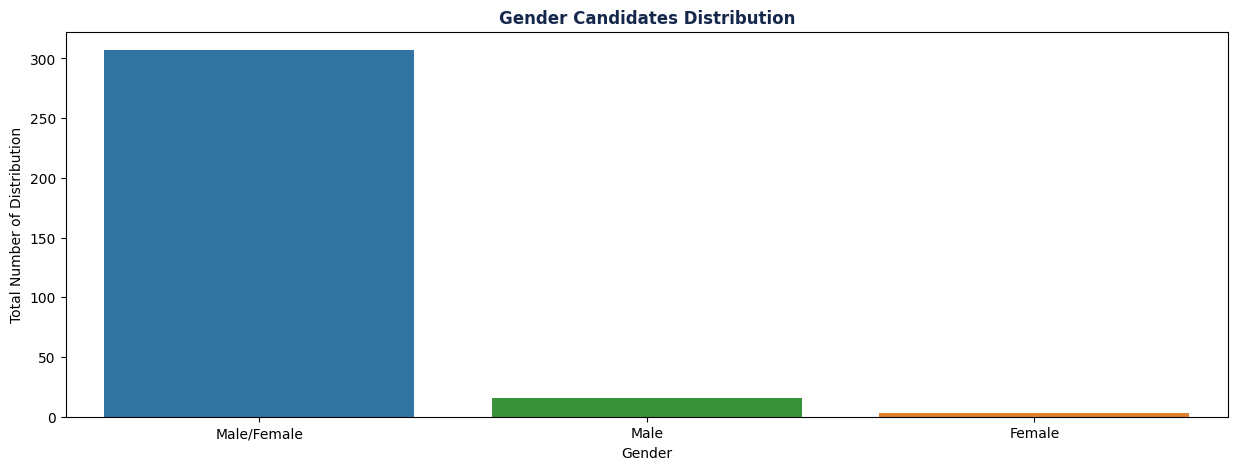

In [74]:

plt.figure(figsize=(15,5))
sns.countplot(x='Gender', hue=df_sent['Gender'], data=df_sent, order = df_sent['Gender'].value_counts().index)
plt.title('Gender Candidates Distribution', fontweight='bold', color='#15284C')
plt.xlabel('Gender')
plt.ylabel('Total Number of Distribution')
plt.show()

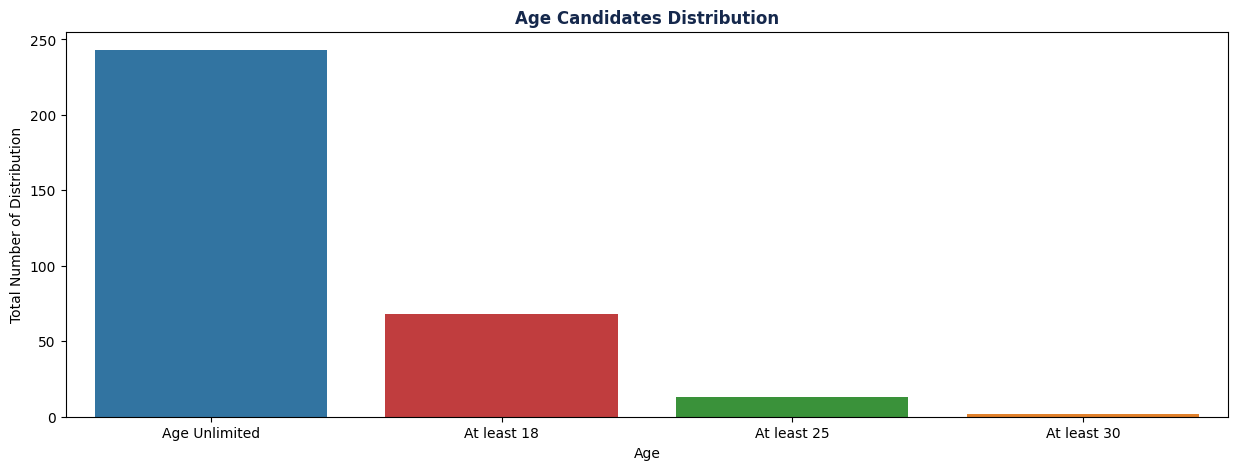

In [75]:

plt.figure(figsize=(15,5))
sns.countplot(x='Age', hue=df_sent['Age'], data=df_sent, order = df_sent['Age'].value_counts().index)
plt.title('Age Candidates Distribution', fontweight='bold', color='#15284C')
plt.xlabel('Age')
plt.ylabel('Total Number of Distribution')
plt.show()

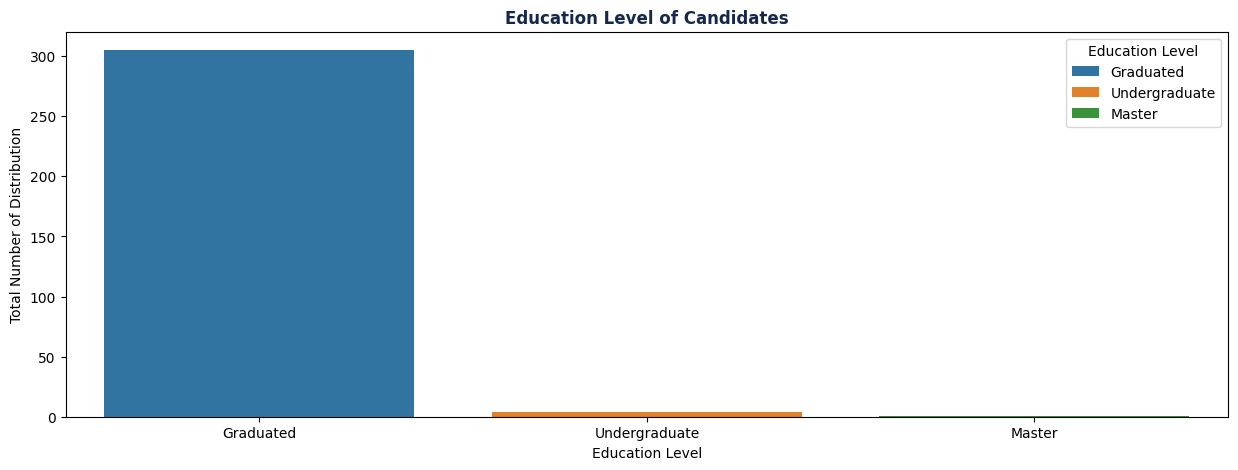

In [76]:

plt.figure(figsize=(15,5))
sns.countplot(x='Education Level', hue=df_sent['Education Level'], data=df_sent, order = df_sent['Education Level'].value_counts().index)
plt.title('Education Level of Candidates', fontweight='bold', color='#15284C')
plt.xlabel('Education Level')
plt.ylabel('Total Number of Distribution')
plt.show()

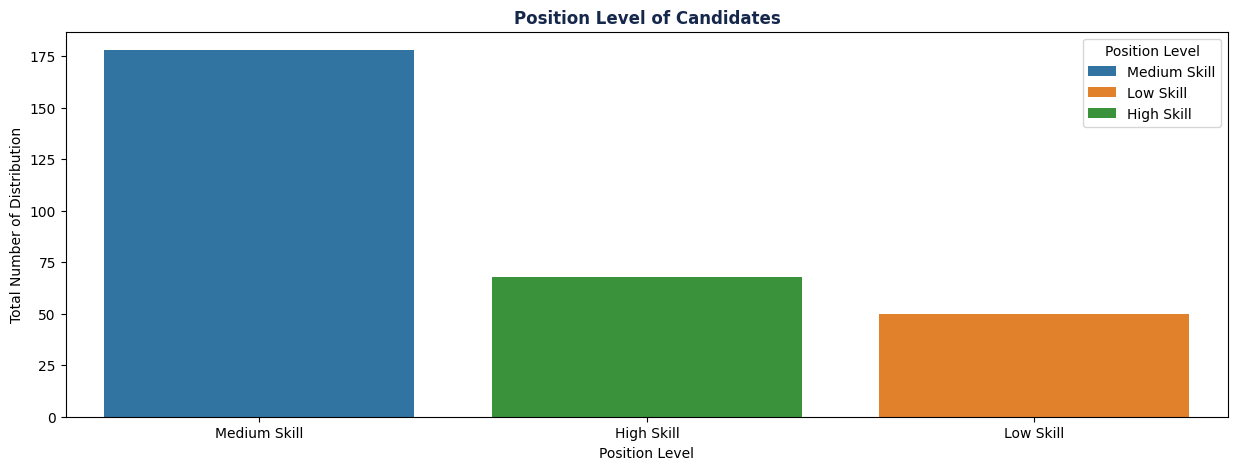

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x='Position Level', hue=df_sent['Position Level'], data=df_sent, order = df_sent['Position Level'].value_counts().index)
plt.title('Position Level of Candidates', fontweight='bold', color='#15284C')
plt.xlabel('Position Level')
plt.ylabel('Total Number of Distribution')
plt.show()

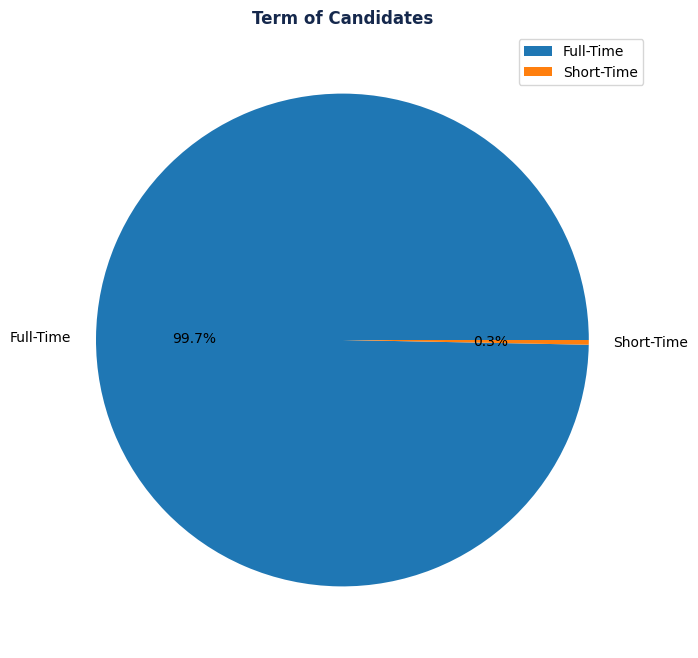

In [85]:

plt.figure(figsize=(8,8))
df_sent['Term'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Term of Candidates', fontweight='bold', color='#15284C')
plt.ylabel(None)
plt.legend()
plt.show()

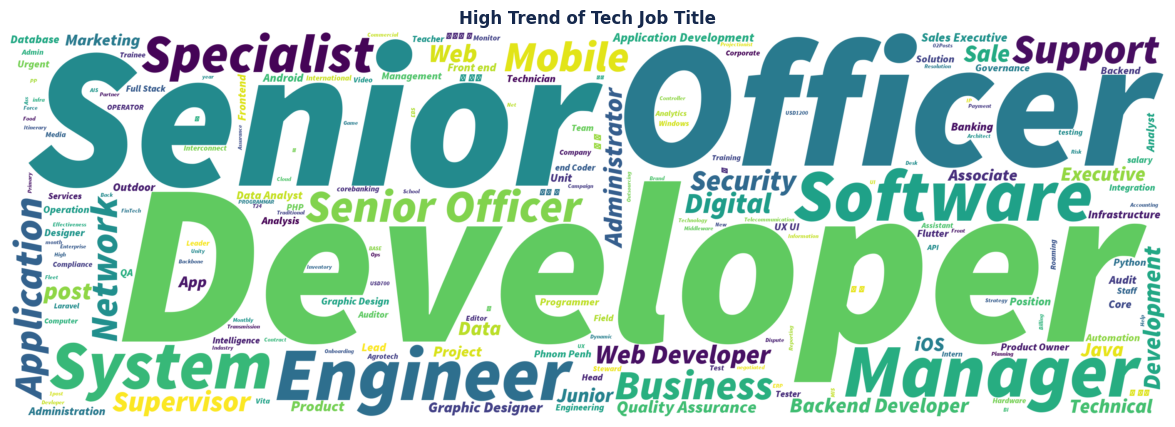

In [95]:
from wordcloud import WordCloud

job_titles_text = ' '.join(df_sent['Job Title'].dropna()) 
wordcloud = WordCloud(width=3000, height=1000, font_path='font.ttf', background_color='white').generate(job_titles_text)

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('High Trend of Tech Job Title', fontweight='bold', color='#15284C')
plt.show()


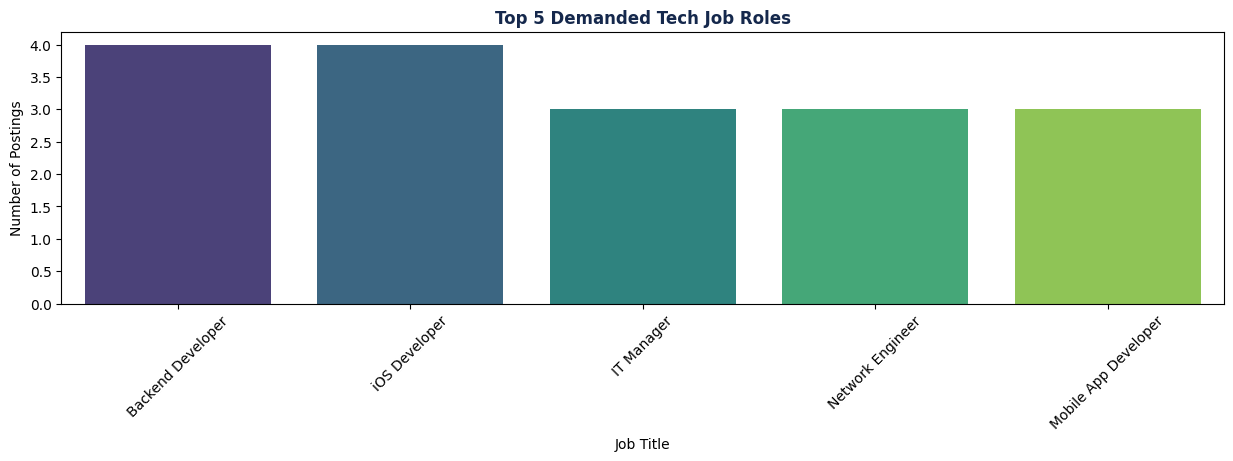

In [112]:

import warnings
warnings.filterwarnings('ignore')

job_demand = df_sent['Job Title'].value_counts().head()
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
sns.barplot(x=job_demand.index, y=job_demand.values, palette='viridis')
plt.title('Top 5 Demanded Tech Job Roles', fontweight='bold', color='#15284C')
plt.xlabel('Job Title')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.show()


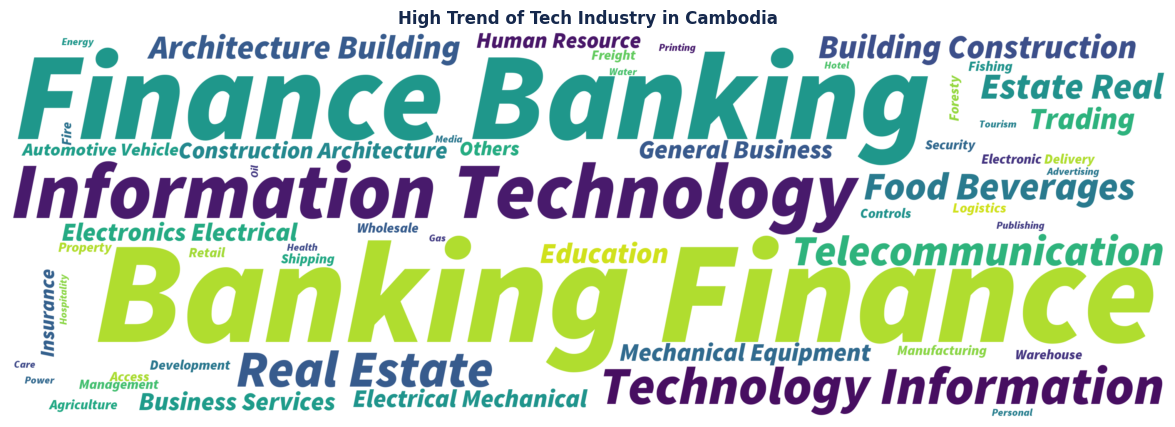

In [110]:
from wordcloud import WordCloud

job_titles_text = ' '.join(df_sent['Industry'].dropna()) 
wordcloud = WordCloud(width=3000, height=1000, font_path='font.ttf', background_color='white').generate(job_titles_text)

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('High Trend of Tech Industry in Cambodia', fontweight='bold', color='#15284C')
plt.show()


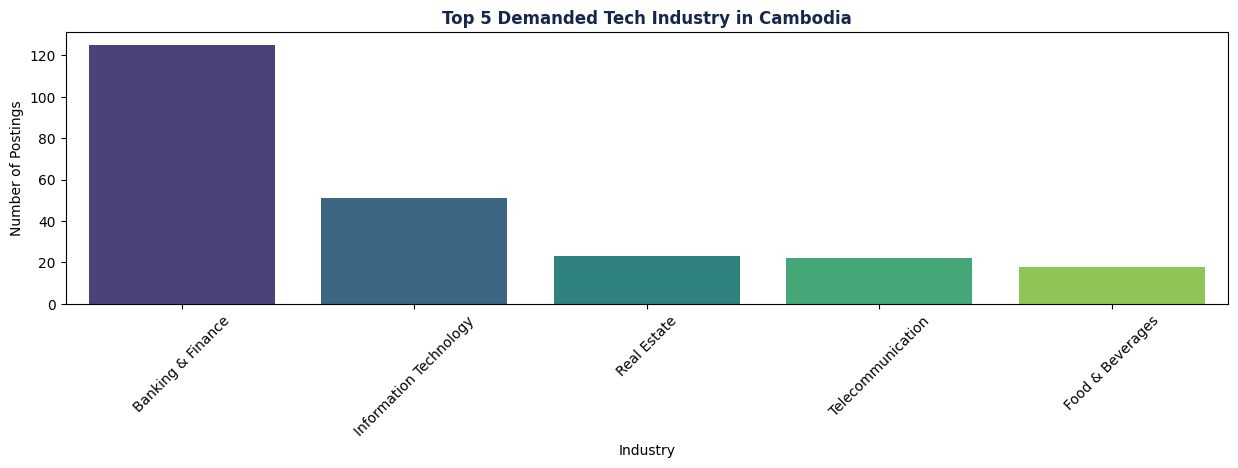

In [111]:

import warnings
warnings.filterwarnings('ignore')

job_demand = df_sent['Industry'].value_counts().head(5)
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
sns.barplot(x=job_demand.index, y=job_demand.values, palette='viridis')
plt.title('Top 5 Demanded Tech Industry in Cambodia', fontweight='bold', color='#15284C')
plt.xlabel('Industry')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.show()


In [113]:
df_sent

,Job Title,Publish Date,Closing Date,Position Level,Year Experience,Number of Hiring,Salary Range (Min),Salary Range (Max),Gender,Age,...,Location 3,Location 4,Location 5,Location 6,Location 7,Duration of Recruiting,Major 1,Major 2,Major 3,Major 4
0,Unity Game Developer,"Thursday, September 8, 2022","Saturday, October 8, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
1,Sales Engineer -Dynamic Technology,"Monday, September 5, 2022","Wednesday, October 5, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
2,Senior Product Development Officer (1post),"Thursday, September 8, 2022","Saturday, October 8, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
3,"Senior Auditor, IT Audit","Thursday, August 18, 2022","Saturday, September 17, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
4,Solution Architect,"Monday, August 15, 2022","Wednesday, September 14, 2022",Medium Skill,2.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Information Technology,Computer Science,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,Junior Roaming & Interconnect Administrator,"Saturday, September 3, 2022","Monday, October 3, 2022",Medium Skill,1.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
324,Junior Roaming & Interconnect Administrator,"Friday, September 2, 2022","Sunday, October 2, 2022",Medium Skill,1.0,1,NaN,NaN,Male/Female,Age Unlimited,...,NaN,NaN,NaN,NaN,NaN,30,Computer Science,NaN,NaN,NaN
325,Sales Corporate & SMB (Outdoor),"Saturday, August 27, 2022","Monday, September 26, 2022",Medium Skill,2.0,1,$200,$500,Male/Female,At least 18,...,NaN,NaN,NaN,NaN,NaN,30,Information Technology,NaN,NaN,NaN
326,Network Engineer,"Friday, September 9, 2022","Monday, September 19, 2022",Low Skill,NaN,1,NaN,NaN,Male/Female,Age Unlimited,...,Phnom Penh,Preah Sihanouk,Pursat,NaN,NaN,10,Information Technology,NaN,NaN,NaN
